<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

So far, the "dialact" we have used to talk to Matplotlib is called the Matlab-like pyplot (```plt```) interface. 

The more powerful "dialact" is called the **Object Oriented (OO) interface**. This allows for better manipulation of the various axes.

# 1 Some nomenclature

There is a difference between a Matplotlib figure and axis:
1. A figure is the full canvas that is used to draw stuff on.
2. An axis is the individual mathematical axes used for plotting

# 2 Comparing the two ‘dialects’

### pyplot Interface

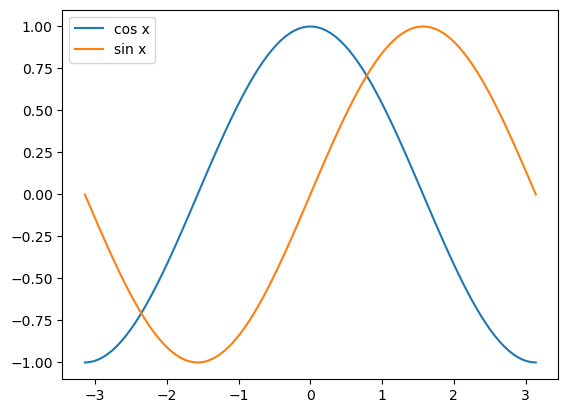

In [1]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
plt.plot(x, cos_x, label = "cos x")
plt.plot(x, sin_x, label = "sin x")
plt.legend()
plt.show()

### OO Interface

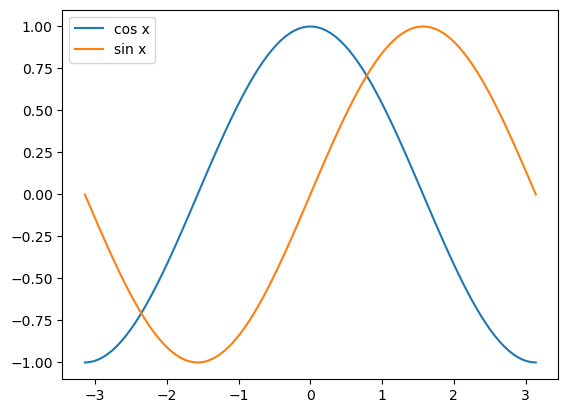

In [2]:
x = np.linspace(-np.pi, np.pi, num = 100)
cos_x = np.cos(x)
sin_x = np.sin(x)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x, cos_x, label = "cos x")
ax.plot(x, sin_x, label = "sin x")
ax.legend()

For the OO interface, we need to start off by using ```subplots()``` to ask Matplotlib to create a figure (```fig```) and an axis (```ax```). OO looks more complicated than the ```pyplot``` version but gives more freedom when dealing with more complex plots.

# 3 What is OO ax, really?

The code below creates the following plot:

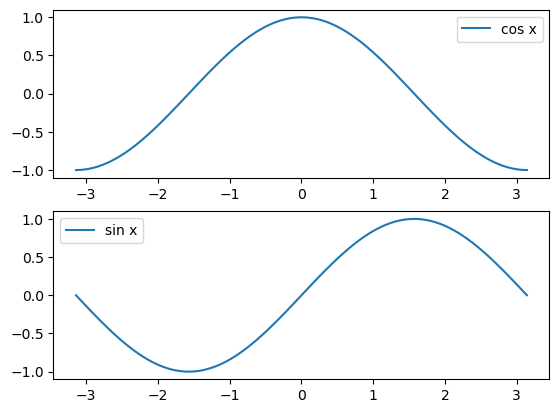

In [3]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].plot(x, cos_x, label = "cos x")
ax[1].plot(x, sin_x, label = "sin x")
ax[0].legend()
ax[1].legend()

To get the above plot, we need two rows and one column (literally):

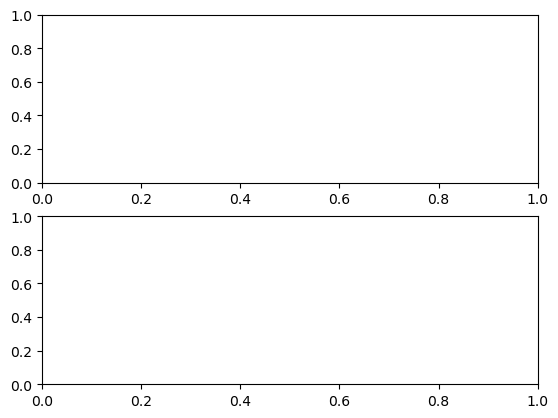

In [4]:
fig, ax = plt.subplots(ncols = 1, nrows = 2)

What is ```ax```?

In [5]:
type(ax)

numpy.ndarray

```ax``` is a NumPy array!

What size is ```ax```?

In [6]:
ax.shape

(2,)

```ax``` has two "things".

What is contained in ```ax```?

In [7]:
type(ax[0])

matplotlib.axes._axes.Axes

This is a Matplotlib axis.

# 4 A complete OO example

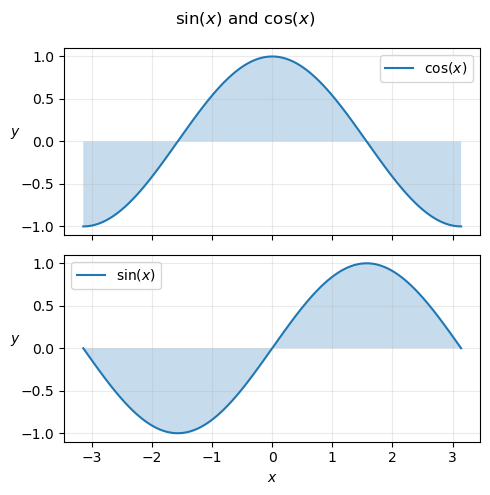

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (5, 5), sharex = True)
# sharex = True means they share the same x-axis

ax[0].plot(x, cos_x, label = r"$\cos(x)$")
ax[0].fill_between(x, 0, cos_x, alpha = 0.25)
ax[1].plot(x, sin_x, label = r"$\sin(x)$")
ax[1].fill_between(x, 0, sin_x, alpha = 0.25)
# r-string used to treat it as a raw string due to "\"

for a in ax:
    a.legend()
    a.grid(alpha = 0.25)
    a.set_ylabel("$y$", rotation = 0)
    # Rotation here is how the "y" is rotated
    # Default is rotated 90 degrees

ax[1].set_xlabel("$x$")

fig.suptitle(r"$\sin(x)$ and $\cos(x)$")
fig.tight_layout()
# This automatically adjusts the subplot parameters so that the subplots fit into the figure area

In [9]:
# fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (5, 5), sharex = True)

This sets up the axes and figure, and gets two axes ready to plot in two rows in one column, and ```figsize``` changes the size of the figure, while ```sharex``` asks that the plots share the same $x$-axis

In [10]:
# ax[0].plot(x, cos_x, label = r"$\cos(x)$")
# ax[0].fill_between(x, 0, cos_x, alpha = 0.25)
# ax[1].plot(x, sin_x, label = r"$\sin(x)$")
# ax[1].fill_between(x, 0, sin_x, alpha = 0.25)

Since ```ax``` is a NumPy array with two axes, we can index them using ```0``` and ```1```. Then we just ```plot``` to that axis.

```fill_between()``` fills the plots. The NumPy array is indexed to access the axes.

In [11]:
# for a in ax:
#    a.legend()
#    a.grid(alpha = 0.25)
#    a.set_ylabel("$y$", rotation = 0)

Using a ```for``` loop, this draws the legends, adds a grid and sets the label for each item in ```ax```.

In [12]:
# ax[1].set_xlabel("$x$")

Since the $x$-axis is shared, only hte lowest plot needs to be labelled and it has index 1.

In [13]:
# fig.suptitle(r"$\sin(x)$ and $\cos(x)$")
# fig.tight_layout()

A super title is then added to the figure, and ```tight_layout()``` makes the necessary adjustments to make the plot look nice.

# 5 Multiple rows and columns

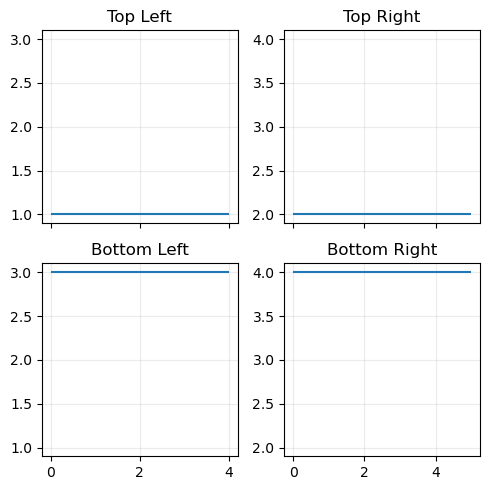

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (5, 5), sharex = "col", sharey = "col")
# x-axis and y-axis is shared for plots in the same column

top_left, top_right, bottom_left, bottom_right = ax.flatten()
# This transforms the 2D array into a 1D array

top_left.set_title("Top Left")
top_right.set_title("Top Right")
bottom_left.set_title("Bottom Left")
bottom_right.set_title("Bottom Right")

top_left.hlines(y = 1, xmin = 0, xmax = 4)
top_right.hlines(y = 2, xmin = 0, xmax = 5)
bottom_left.hlines(y = 3, xmin = 0, xmax = 4)
bottom_right.hlines(y = 4, xmin = 0, xmax = 5)

for a in ax.flatten():
    a.grid(alpha = 0.25)

plt.tight_layout()

### Using ax

To create a figure and axes:

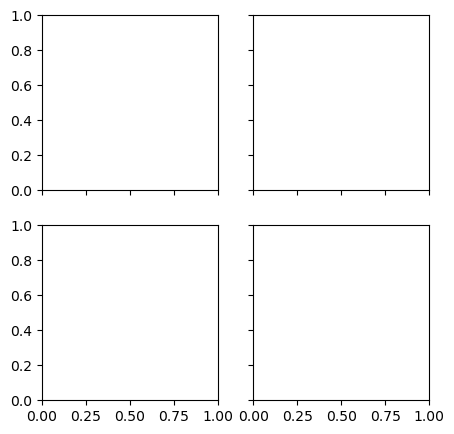

In [15]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (5, 5), sharex = "col", sharey = "row")
# In this case, the x-axis is shared by plots in the same col, 
# and the y-axis is shared by plots in the same row

In [16]:
ax.shape

(2, 2)

```ax``` is a ```2 x 2``` array (2D). Each axes can be accessed via indexing:

In [17]:
# ax[0, 0].set_title("Top Left")
# ax[0, 1].set_title("Top Right")
# ax[1, 0].set_title("Bottom Left")
# ax[1, 1].set_title("Bottom Right")

But a better way to do it is by assigning each to a variable:

In [18]:
top_left = ax[0, 0]
top_right = ax[0, 1]
bottom_left = ax[1, 0]
bottom_right = ax[1, 1]

In [19]:
top_left, top_right, bottom_left, bottom_right = ax.flatten()

## 5.1 Sharing axes

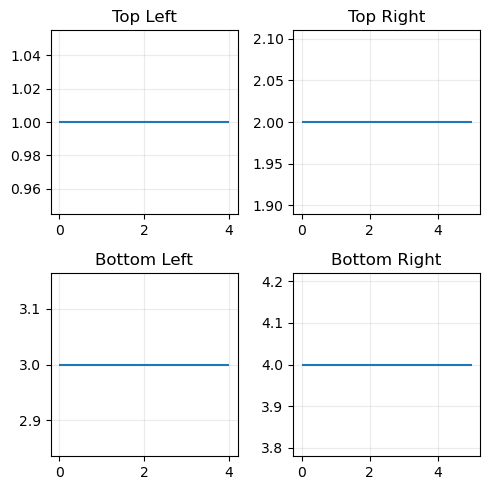

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (5, 5))

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title("Top Left")
top_right.set_title("Top Right")
bottom_left.set_title("Bottom Left")
bottom_right.set_title("Bottom Right")

top_left.hlines(y = 1, xmin = 0, xmax = 4)
top_right.hlines(y = 2, xmin = 0, xmax = 5)
bottom_left.hlines(y = 3, xmin = 0, xmax = 4)
bottom_right.hlines(y = 4, xmin = 0, xmax = 5)

for a in ax.flatten():
    a.grid(alpha = 0.25)

plt.tight_layout()

Without ```sharex``` and ```sharey```, the plots aren't as compact as before. In addition, the two axes have been auto-scaled.

|Option|Result|
|:---:|:----|
|```True```|Makes **all** the axes use the same range.|
|```col```|Use the same range for all the columns.|
|```row```|Use the same range for all the rows.|

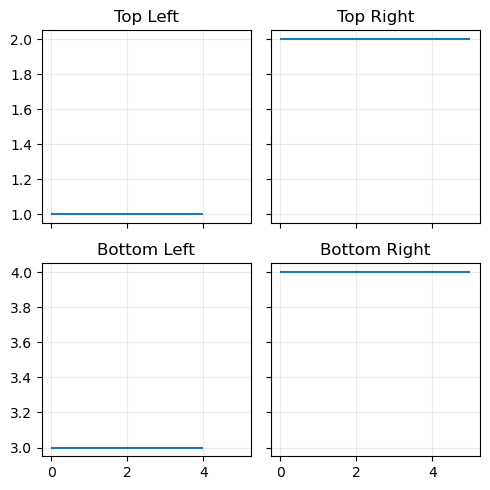

In [21]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (5, 5), sharex = True, sharey = "row")
# All plots have the same range for x-axis

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title("Top Left")
top_right.set_title("Top Right")
bottom_left.set_title("Bottom Left")
bottom_right.set_title("Bottom Right")

top_left.hlines(y = 1, xmin = 0, xmax = 4)
top_right.hlines(y = 2, xmin = 0, xmax = 5)
bottom_left.hlines(y = 3, xmin = 0, xmax = 4)
bottom_right.hlines(y = 4, xmin = 0, xmax = 5)

for a in ax.flatten():
    a.grid(alpha = 0.25)

plt.tight_layout()

Now, all the plots have the same range for the $x$-axis.

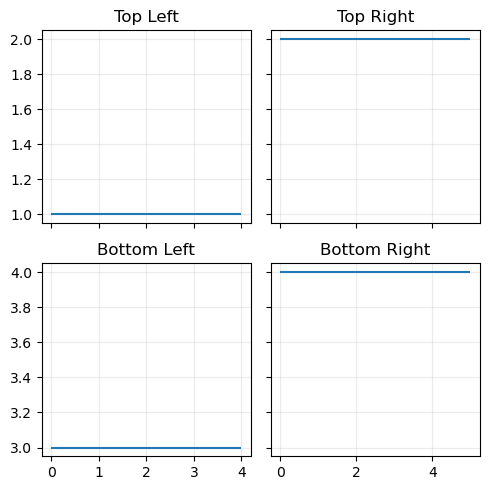

In [22]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (5, 5), sharex = "col", sharey = "row")

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title("Top Left")
top_right.set_title("Top Right")
bottom_left.set_title("Bottom Left")
bottom_right.set_title("Bottom Right")

top_left.hlines(y = 1, xmin = 0, xmax = 4)
top_right.hlines(y = 2, xmin = 0, xmax = 5)
bottom_left.hlines(y = 3, xmin = 0, xmax = 4)
bottom_right.hlines(y = 4, xmin = 0, xmax = 5)

for a in ax.flatten():
    a.grid(alpha = 0.25)

plt.tight_layout()

## 5.2 Accessing all axes

Accessing all the axes can be done individually, but using a ```for``` loop is much more efficient.

In [23]:
# top_left.grid(alpha = 0.25)
# top_right.grid(alpha = 0.25)
# bottom_left.grid(aalpha = 0.25)
# bottom_right.grid(alpha = 0.25)

# for a in ax.flatten():
#     a.grid(alpha = 0.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function

```txt
basic_monthly_mean
3701
2850
3053
3557

basic_monthly_mean
2741
3057
3098
2960

Since the data of structure is as such, the first row needs to be skipped:

In [24]:
def get_plot_data():
    data = {}
    filename = "sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv"
    data["ALL"] = np.loadtxt(filename, skiprows = 1)

    filename = "sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv"
    data["NUS"] = np.loadtxt(filename, skiprows = 1)

    return data

### The histogram

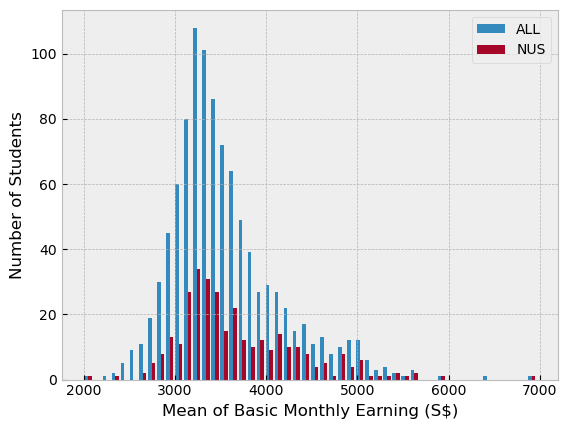

In [25]:
plt.style.use("bmh")
data = get_plot_data()

# Bins here specifies how many bins to split the data
plt.hist([data["ALL"], data["NUS"]], bins = 50, label = ["ALL", "NUS"])
plt.xlabel("Mean of Basic Monthly Earning (S$)")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

## 6.2 Scatter plots

Scatter plots are created by putting a marker at an $(x, y)$ point specified.

Reusing the same data from beforehand, since some values of $x$ are needed, ```range()``` along with ```len()``` is going to be used to generate a list.

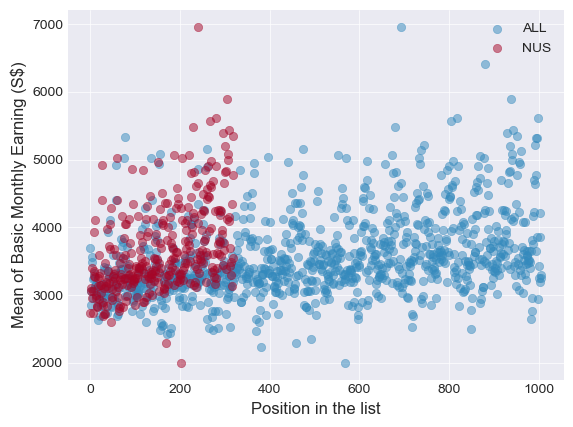

In [26]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

# Tuple of key and value pair, for "ALL" and "NUS"
for label, numbers in data.items():
    x = range(len(numbers))
    # List of [0, 1, 2...]
    y = numbers
    plt.scatter(x, y, label = label, alpha = 0.5)

plt.xlabel("Position in the list")
plt.ylabel("Mean of Basic Monthly Earning (S$)")
plt.legend()
plt.show()

## 6.3 Bar charts

Using some dummy data, the data is extracted and typecasted to pass two lists to ```bar()```. Use ```barh()``` for horizontal bars:

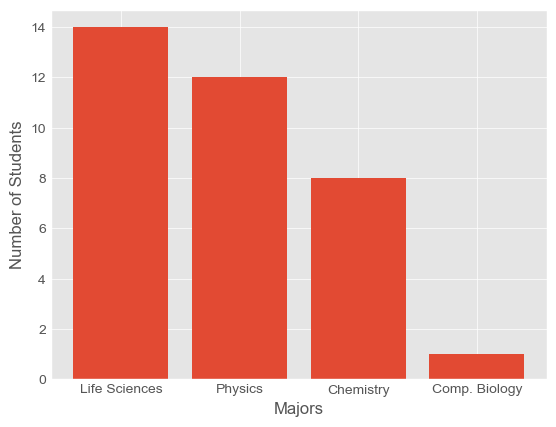

In [27]:
student_numbers = {"Life Sciences": 14, "Physics": 12, "Chemistry": 8, "Comp. Biology": 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use("ggplot")
plt.bar(majors, numbers)
plt.xlabel("Majors")
plt.ylabel("Number of Students")
plt.show()

## 6.4 Pie charts

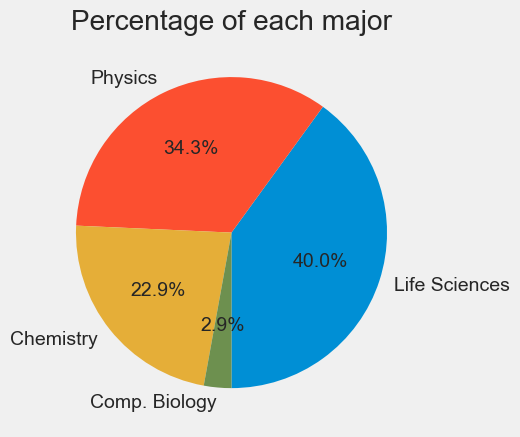

In [39]:
student_numbers = {"Life Sciences": 14, "Physics": 12, "Chemistry": 8, "Comp. Biology": 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use("fivethirtyeight")
plt.pie(numbers, labels = majors, autopct = "%1.1f%%", startangle = -90)
# For autopct, no. before "." justifies the text with a fixed number of spaces
# no. after "." is the number of digits after the decimal
# %f specifies float number, % at the end adds % behind each number
plt.title("Percentage of each major")
plt.show()